https://kdors.github.io

# CMPS 3660 Final Tutorial
 By Kennedy Dorsey


## NFL Suspensions & Elo Ratings

Datasets: 

https://github.com/fivethirtyeight/data/tree/master/nfl-suspensions

https://github.com/fivethirtyeight/data/tree/master/nfl-elo

This tutorial aims to uncover any relationships between NFL suspensions and NFL game statistics and game outcomes, if there are any. NFL suspensions happen for a variety of reasons, but many of those reasons can be divided up into a few categories. The main cause for suspension, as shown by the data below, is the use of performance-enhancing drugs (PEDs). Obviously, many players use these drugs to enhance their abilities, especially when performing well is critical to staying in the NFL (as opposed to contracts in the NBA or MLB). Regarding the use of these drugs, one question that comes to mind is how well do teams that have players using PEDs perform, and can PEDS use be modeled using the statistics of teams that have player(s) who use these drugs? To tackle this question, data from two datasets linked above are used. 

The first dataset provides information about what team a player was on and what year it was when a player was suspended, why that player was suspended, and the length of time that he was suspended. Although this dataset does not include every suspension given by the NFL, (the NFL interestingly does not have a standard for documenting suspensions), this dataset does reveal some key characteristics of the nature of suspensions in the league.

The second dataset provides information about each game in the NFL from 1920 to 2019. This information includes the home team name, the away team name, the scores for both teams, whether it was a playoff game or not, and elo ratings before and after the game. This dataset includes other Elo measures as well, however, the data mentioned above is mainly the data that this tutorial will use. Elo ratings are ratings based off of the Elo rating system, created by physics professor Arpad Elo. These ratings are used to show which teams are more likely to win regular-season and playoff games. The mean Elo rating for an NFL team is about 1500. More information about Elo ratings and its history can be found at: https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/.  



## Extraction, Transform, and Load

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_suspensions = pd.read_csv('./data/nfl-suspensions.csv')
df_suspensions.head()

,name,team,games,category,desc.,year,source
0,F. Davis,WAS,Indef.,"Substance abuse, repeated offense",Marijuana-related,2014,http://www.cbssports.com/nfl/eye-on-football/2...
1,J. Blackmon,JAX,Indef.,"Substance abuse, repeated offense",NaN,2014,http://espn.go.com/nfl/story/_/id/11257934/jus...
2,L. Brazill,IND,Indef.,"Substance abuse, repeated offense",NaN,2014,http://www.nfl.com/news/story/0ap2000000364622...
3,T. Jackson,WAS,Indef.,"Substance abuse, repeated offense",NaN,2014,http://www.nfl.com/news/story/0ap2000000364087...
4,M. Hapes,NYG,Indef.,Personal conduct,Gambling-related,1946,http://espn.go.com/blog/nflnation/tag/_/name/f...


In [3]:
# drop unnecessary columns
df_suspensions = df_suspensions.drop(columns=['source'])

# change team abbreviation to match abbreviation in other dataframe
df_suspensions['team'] = df_suspensions['team'].replace('WAS','WSH')

# change year column to float
df_suspensions['year'] = df_suspensions['year'].replace('   ', 0)
df_suspensions['year'] = df_suspensions['year'].astype('int64')

df_suspensions.head()

,name,team,games,category,desc.,year
0,F. Davis,WSH,Indef.,"Substance abuse, repeated offense",Marijuana-related,2014
1,J. Blackmon,JAX,Indef.,"Substance abuse, repeated offense",NaN,2014
2,L. Brazill,IND,Indef.,"Substance abuse, repeated offense",NaN,2014
3,T. Jackson,WSH,Indef.,"Substance abuse, repeated offense",NaN,2014
4,M. Hapes,NYG,Indef.,Personal conduct,Gambling-related,1946


In [4]:
df_nfl_elo = pd.read_csv('./data/nfl_elo.csv')
df_nfl_elo.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,1920-09-26,1920,0,NaN,RII,STP,1503.947,1300.000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
1,1920-10-03,1920,0,NaN,DAY,COL,1493.002,1504.908,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
2,1920-10-03,1920,0,NaN,RII,MUN,1516.108,1478.004,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0
3,1920-10-03,1920,0,NaN,CHI,MUT,1368.333,1300.000,0.682986,0.317014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.0
4,1920-10-03,1920,0,NaN,CBD,PTQ,1504.688,1300.000,0.825267,0.174733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0


In [5]:
# date column is datetime
# change date column to datetime 
df_nfl_elo['date'] = pd.to_datetime(df_nfl_elo['date'])


Since the year that suspensions are first documented is 1946, the years before that are removed from the dataframe df_nfl_elo to be more consistent.

In [6]:
# suspensions data starts at year 1946
pd.unique(df_suspensions['year'])

array([2014, 1946, 1947, 2010, 2008, 2007, 1983, 2009, 2005, 2000, 2012,
       2001, 2006, 1989,    0, 1963, 2013, 1990, 2011, 2004, 2002, 2003,
       1997, 1999, 1993, 1995, 1998, 1994, 1986])

In [7]:
# drop columns that aren't used in analysis
df_nfl_elo = df_nfl_elo[['date','season','team1','team2','elo1_pre','elo2_pre','elo1_post','elo2_post','elo_prob1','elo_prob2','score1','score2']]

# drop rows for years before 1946
drop_rows = df_nfl_elo[df_nfl_elo['season'] <= 1946].index
df_nfl_elo = df_nfl_elo.drop(drop_rows)
df_nfl_elo.head()

,date,season,team1,team2,elo1_pre,elo2_pre,elo1_post,elo2_post,elo_prob1,elo_prob2,score1,score2
1818,1947-08-29,1947,CRA,LDA,1354.421,1379.225,1338.673,1394.972,0.557590,0.442410,21.0,24.0
1819,1947-08-31,1947,SF,BDA,1449.741,1279.410,1460.240,1268.911,0.794893,0.205107,23.0,7.0
1820,1947-08-31,1947,BBA,NAA,1298.979,1422.951,1318.297,1403.633,0.415938,0.584062,28.0,24.0
1821,1947-09-05,1947,CLE,BBA,1496.896,1318.297,1506.969,1308.224,0.802544,0.197456,30.0,14.0
1822,1947-09-05,1947,NAA,CRA,1403.633,1338.673,1422.654,1319.652,0.678767,0.321233,48.0,26.0


## Exploratory Data Analysis

Text(0.5, 1.0, 'Suspensions by Year')

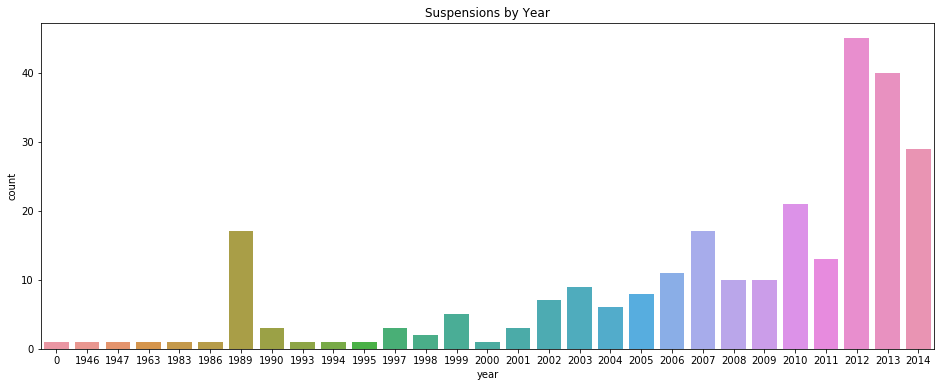

In [14]:
year_sorted = df_suspensions['year'].tolist().sort()
plt.figure(figsize=(16,6))
ax = sns.countplot(x='year', data=df_suspensions, order = year_sorted)
ax.set_title("Suspensions by Year")

Text(0.5, 1.0, 'Suspensions by Team')

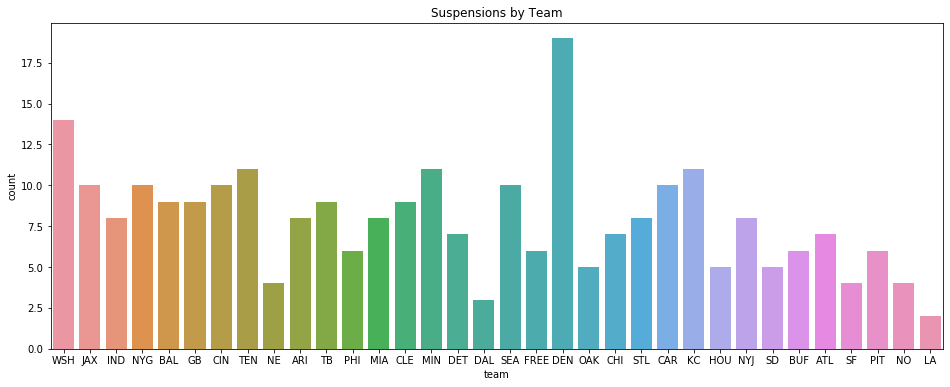

In [13]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='team', data = df_suspensions)
ax.set_title('Suspensions by Team')

From the plots above, there is a increase in suspensions more recently (which could just be due to greater documentation now than in the past). When looking at teams, Denver stands out as being the team with the most suspensions. To see if there are any interesting trends in Denver's scoring and elo ratings over the years, graphs are created comparing Denver with the rest of the league.

Text(0.5, 1.0, 'DEN Suspension Count')

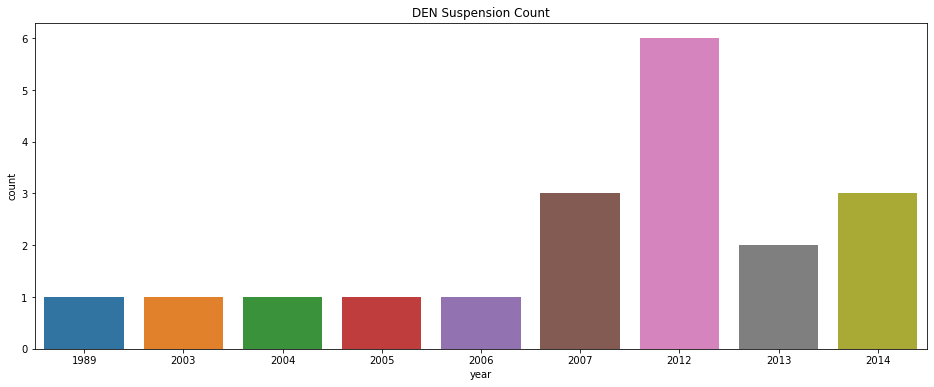

In [16]:
plt.figure(figsize=(16,6))
ax = ax = sns.countplot(x='year', data=df_suspensions[df_suspensions['team']=="DEN"], order = year_sorted)
ax.set_title("DEN Suspension Count")

Text(0.5, 1.0, 'Mean Score at Home')

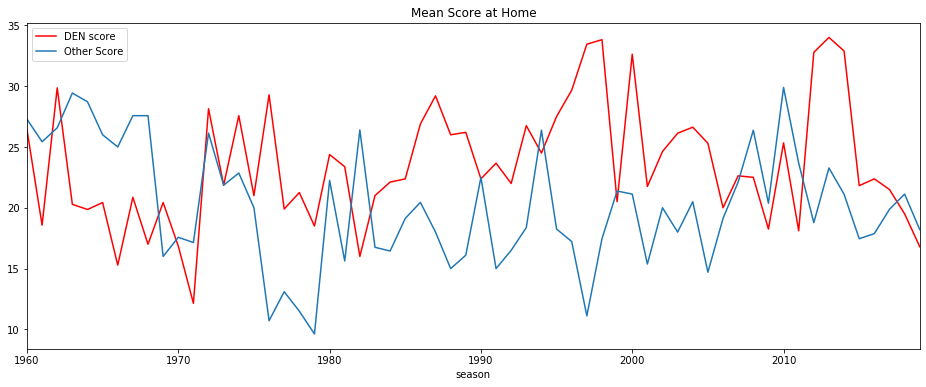

In [17]:
plt.figure(figsize=(16,6))
ax = df_nfl_elo[df_nfl_elo['team1'] == "DEN"].groupby('season')['score1'].mean().plot(legend=True, color="red")
ax = df_nfl_elo[df_nfl_elo['team1'] == "DEN"].groupby('season')['score2'].mean().plot(legend=True)
ax.legend(['DEN score','Other Score'])
ax.set_title("Mean Score at Home")

Text(0.5, 1.0, 'Mean Elo Post-Game')

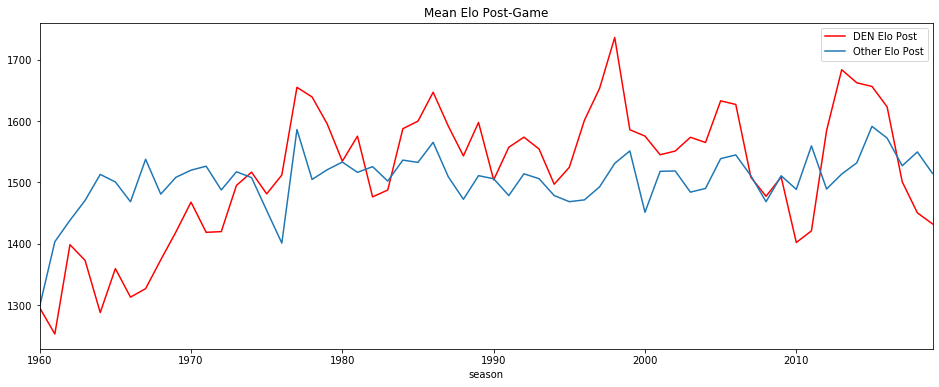

In [19]:
plt.figure(figsize=(16,6))
ax = df_nfl_elo[df_nfl_elo['team1'] == "DEN"].groupby('season')['elo1_post'].mean().plot(legend=True,color="red")
ax = df_nfl_elo[df_nfl_elo['team1'] == "DEN"].groupby('season')['elo2_post'].mean().plot(legend=True)
ax.legend(['DEN Elo Post','Other Elo Post'])
ax.set_title("Mean Elo Post-Game")

There is a spike in 2012 in suspensions for Denver. Looking at the line plots comparing Denver's scoring and Elo post-game ratings, there is also a spike around 2012. Denver seems to be doing really well at the same time many suspensions are occurring. 

Instead of just looking at Denver, let's compare the top 5 teams with the most suspensions with the rest of the league. A line plot is created that compares mean scores of the top 5 teams at home with the mean scores from the other teams at home.

Text(0.5, 1.0, 'Mean Scores')

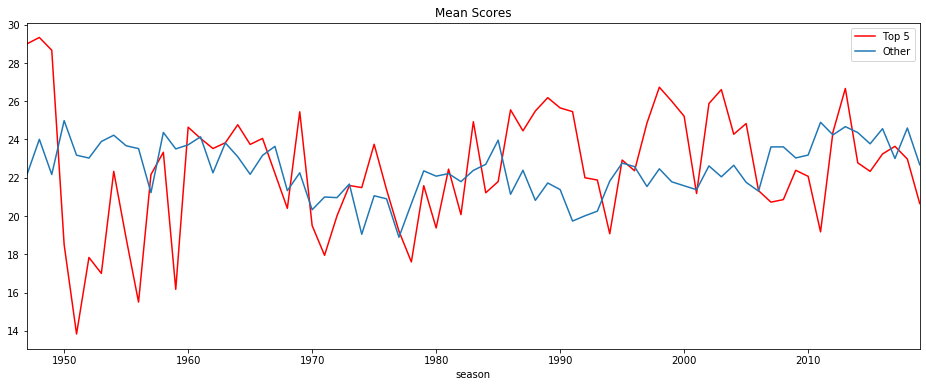

In [22]:
# plot top 5
plt.figure(figsize=(16,6))
df_top5_sus = df_nfl_elo[(df_nfl_elo['team1'] == "DEN") | (df_nfl_elo['team1'] == "WSH")| (df_nfl_elo['team1'] == "TEN")| (df_nfl_elo['team1'] == "MIN")| (df_nfl_elo['team1'] == "KC")]
ax = df_top5_sus.groupby('season')['score1'].mean().plot(legend=True, color="red")

# plot everyone else
df_other_sus = df_nfl_elo[~((df_nfl_elo['team1'] == "DEN") | (df_nfl_elo['team1'] == "WSH")| (df_nfl_elo['team1'] == "TEN")| (df_nfl_elo['team1'] == "MIN")| (df_nfl_elo['team1'] == "KC"))]
ax = df_other_sus.groupby('season')['score1'].mean().plot(legend=True)

ax.legend(["Top 5", "Other"])
ax.set_title("Mean Scores")


From the graph  above, it appears that the top five teams in suspensions scored higher on average than the rest of the league from 1995 to 2005, but then scored lower. However, there was an uptick around 2012 again, but it seems like it has dropped again recently.